# Персептроны. Процедура обучения Розенблатта

**Цель работы:** исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов.

| <!-- --> | <!-- --> |
|:---------|:---------|
| Студент    | Почечура А.А.   |
| Группа   | М8О-406Б-20  |
| Вариант    | 18   |

Импортируем библиотеки:

In [3]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import torch.nn as nn
from tqdm import tqdm

Заведём значения для задания 1:

In [4]:
x_1 = [2.6, 3.0, -1.3, 2.9, -1.8, -0.7]
y_1 = [-1.1, 2.5, -2.9, 4.4, 1.7, 3.3]

c_1 = [1, 1, 1, 1, 0, 0]

Изобразим данные нам точки на графике

In [6]:
def paint_dots(data_x, data_y, classes):
  for (x, y, c) in zip(data_x, data_y, classes):
    if (c == 0):
      plt.scatter(x, y, c="blue")
    if (c == 1):
      plt.scatter(x, y, c="yellow")
    if (c == 2):
      plt.scatter(x, y, c="purple")
    if (c == 3):
      plt.scatter(x, y, c="green")
  plt.show()

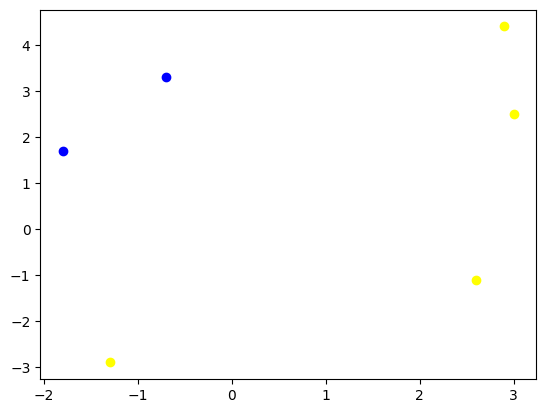

In [7]:
paint_dots(x_1, y_1, c_1)

Создаём 2 тензора типа Float:
  - Первый тензор *(x_train_1)* хранит список списков размерности (6, 2) - координаты точек
  - Второй тензор *(y_train_1)* хранит номера классов, размерность (6, 1)

In [8]:
x_train_1 = torch.FloatTensor(list(zip(x_1, y_1)))
y_train_1 = torch.FloatTensor(c_1).view(-1,1)

Создадим класс Perceptron, чтобы можно было удобно и быстро работать с моделью. В объявлении класса зададим случайные значения параметрам *w* и *b*. Функция *forward* обеспечит пресказывание результирующего значения. Опишем метод *fit*: в нём мы сначала предсказываем значения с помощью функции *forward*, затем применяем функцию активации *sigmoid*, чтобы определить получившийся класс, далее считаем среднюю квадратичную ошибку MAE, и потом обнуляем градиент.

In [9]:
class Perceptron(nn.Module):
  def __init__(self, inputs, outputs):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(inputs, outputs))
    self.bias = nn.Parameter(torch.randn(outputs))

  def forward(self, x):
    x = x @ self.weights + self.bias
    return x

  def fit(self, x_train, y_train, loss_fn, optimizer, epochs):
    losses = []
    with tqdm(desc="epoch", total=epochs) as bar:
      for epoch in range(epochs):
        y_pred = self(x_train)
        out = torch.sigmoid(y_pred)
        loss = loss_fn(out, y_train)
        loss.backward()
        l = loss.detach().numpy()
        losses.append(l)
        optimizer.step()
        optimizer.zero_grad()
        bar.set_postfix({"current loss": l})
        bar.update()
    return losses

Инициализируем персептрон для первой части задания, функцию ошибки и функцию оптимизации

In [10]:
perc_1 = Perceptron(2, 1)
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(perc_1.parameters(), lr=0.1)

Обучаем модель 1000 эпох

In [16]:
l = perc_1.fit(x_train_1, y_train_1, loss_func, optimizer, 1000)

epoch: 100%|██████████| 1000/1000 [00:03<00:00, 327.16it/s, current loss=0.05621281]


Выведем график MAE ошибок

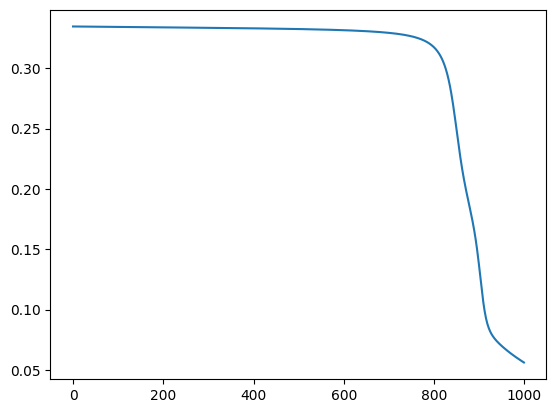

In [17]:
plt.plot(l)
plt.show()

Теперь отрисуем получившуюся нами прямую на графике, который имел до этого исходные точки

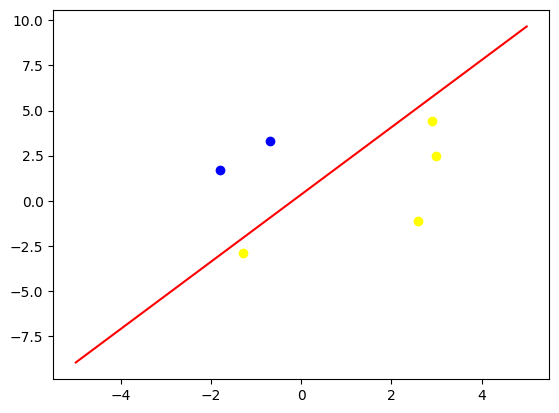

In [19]:
w = perc_1.weights.detach().numpy()
b = perc_1.bias.detach().numpy()

X = [-5, 5]
Y = [(-x * w[0] - b[0])/w[1] for x in X]

plt.plot(X, Y, "red")
paint_dots(x_1, y_1, c_1)
plt.show()

Перейдём ко второй части задания и заведём новые значения

In [20]:
x_2 = [-2.8, -2.8, -1.9, -0.7, 4, -0.7, -2.5, 0.9]
y_2 = [-3.3, -0.7, 4.2, -3.2, 4.7, -3.9, -1, -2.4]

c_2_1 = [0, 0, 1, 0, 1, 0, 0, 1]
c_2_2 = [1, 1, 1, 0, 0, 0, 1, 0]

c_2 = list(zip(c_2_1, c_2_2))
classes_2_int = [int(str(a)+str(b), 2) for a, b in c_2]

Изобразим данные нам точки на графике

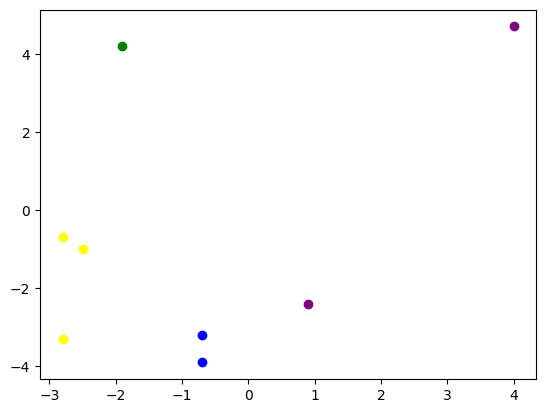

In [21]:
paint_dots(x_2, y_2, classes_2_int)

Создаём 2 тензора типа Float:

Первый тензор (x_train_2) хранит список списков размерности (8, 2) - координаты точек

Второй тензор (y_train_2) хранит номера классов, размерность (8, 2)

In [24]:
x_train_2 = torch.FloatTensor(list(zip(x_2, y_2)))
y_train_2 = torch.FloatTensor(list(zip(c_2_1, c_2_2)))

Инициализируем персептрон для второй части задания, функцию ошибки и функцию оптимизации (отличия от первой чаcти задания: размерность персептрона и значение learning rate)

In [25]:
perc_2 = Perceptron(2, 2)
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(perc_2.parameters(), lr=0.4)

Обучаем модель 1000 эпох

In [26]:
l = perc_2.fit(x_train_2, y_train_2, loss_func, optimizer, 4000)

epoch: 100%|██████████| 4000/4000 [00:08<00:00, 456.59it/s, current loss=0.0023722157]


Выведем график MAE ошибок

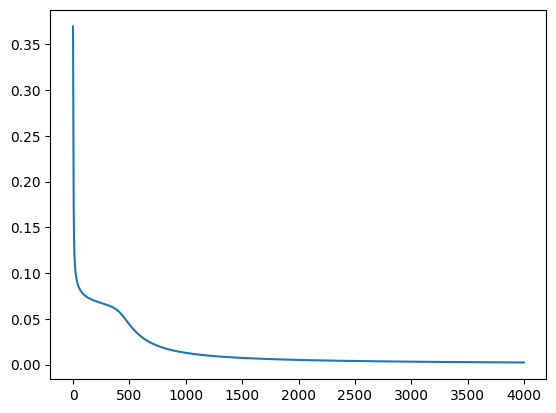

In [27]:
plt.plot(l)
plt.show()

Отрисуем получившиеся нами прямые на графике, который имел до этого исходные точки

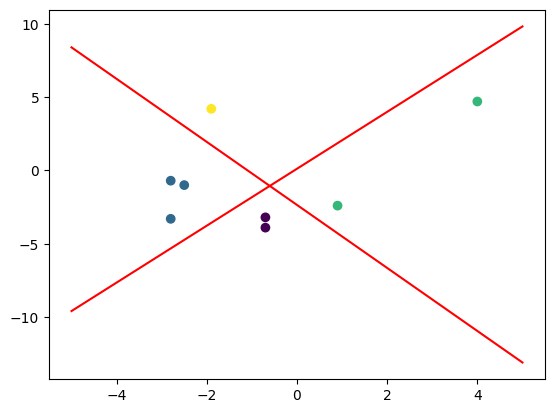

In [28]:
w = perc_2.weights.detach().numpy()
b = perc_2.bias.detach().numpy()

X = [-5, 5]
Y_1 = [(-x * w[0][0] - b[0])/w[1][0] for x in X]
Y_2 = [(-x * w[0][1] - b[1])/w[1][1] for x in X]

plt.plot(X, Y_1, "red", X, Y_2, "red")
plt.scatter(x_2, y_2, c=classes_2_int)
plt.show()

**Вывод**: в ходе выполнения лабораторной работы был реализован простейший персептрон Розенблатта. С его помощью удалось успешно решить задачи бинарной и многоклассовой классификации. Также во время выполнения работы были улучшены навыки работы с библиотеками Python (torch, matplotlib, tqdm), что в дальнейшем может пригодиться для выполнения более сложных работ по обучению ИИ моделей.